In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
Considere o conjunto de dados disponível em artificial1d.csv organizado em duas colunas, x e y. Seja um modelo de regressão linear para $\hat{y} = f(x)$.

a. Apresente os parâmetros do modelo e o MSE (erro quadrático médio) obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote a reta resultante sobre os dados

In [2]:
dataset = np.genfromtxt('./artificial1d.csv', delimiter=',')

X = np.c_[dataset[:, 0]]
y = dataset[:, [1]]

In [3]:
def ols(X, y):
    N = X.shape[0]
    X = np.c_[np.ones(N), X]

    A = X.T @ X
    b = X.T @ y

    w_hat = np.linalg.solve(A, b)

    y_pred = X @ w_hat

    mse = (1/N) * np.sum((y - y_pred) ** 2)

    return w_hat, mse, y_pred

Coeficientes: [[0.06761792]
 [1.57486517]]
MSE: 0.2134


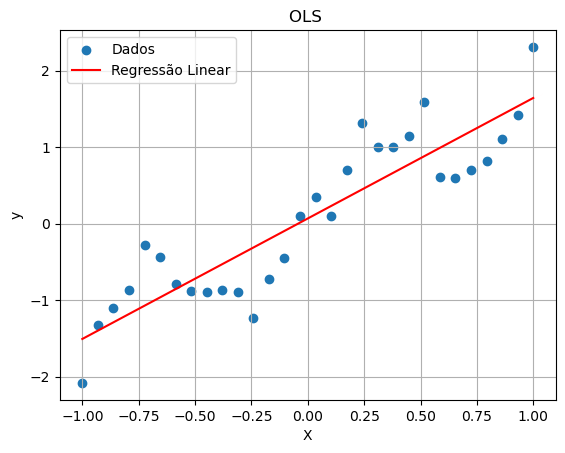

In [4]:
w_hat, mse, y_pred = ols(X, y)

print(f"Coeficientes: {w_hat}")
print(f"MSE: {mse:.4f}")

plt.scatter(X, y, label="Dados")
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("OLS ")
plt.legend()
plt.grid(True)
plt.show()

b. Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [5]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std, data_mean, data_std

def denormalize(data, mean, std):
    return data * std + mean

def gradient_descent(alpha, num_epochs, X, y):
    N = X.shape[0]

    X_norm, _, _ = normalize(X)
    y_norm, y_mean, y_std = normalize(y)
    y_norm = y_norm.reshape(-1, 1)

    X_b = np.c_[np.ones((N, 1)), X_norm]
    w = np.random.randn(X_b.shape[1], 1)

    losses = []

    for epoch in range(num_epochs):
        y_pred_norm = X_b @ w
        errors = y_norm - y_pred_norm

        gradients = (1 / N) * (X_b.T @ errors)
        w += alpha * gradients

        y_pred = denormalize(y_pred_norm, y_mean, y_std)
        
        mse = np.mean((y - y_pred) ** 2)
        losses.append(mse)

        print(f"Época: {epoch}; MSE: {mse:.4f}")

    print("Pesos (w):\n", w)
    return w, losses, y_pred

Época: 0; MSE: 1.6611
Época: 1; MSE: 1.3860
Época: 2; MSE: 1.1632
Época: 3; MSE: 0.9828
Época: 4; MSE: 0.8366
Época: 5; MSE: 0.7182
Época: 6; MSE: 0.6223
Época: 7; MSE: 0.5446
Época: 8; MSE: 0.4817
Época: 9; MSE: 0.4307
Época: 10; MSE: 0.3894
Época: 11; MSE: 0.3560
Época: 12; MSE: 0.3289
Época: 13; MSE: 0.3069
Época: 14; MSE: 0.2892
Época: 15; MSE: 0.2748
Época: 16; MSE: 0.2631
Época: 17; MSE: 0.2537
Época: 18; MSE: 0.2460
Época: 19; MSE: 0.2398
Época: 20; MSE: 0.2348
Época: 21; MSE: 0.2307
Época: 22; MSE: 0.2274
Época: 23; MSE: 0.2248
Época: 24; MSE: 0.2226
Época: 25; MSE: 0.2209
Época: 26; MSE: 0.2194
Época: 27; MSE: 0.2183
Época: 28; MSE: 0.2174
Época: 29; MSE: 0.2166
Época: 30; MSE: 0.2160
Época: 31; MSE: 0.2155
Época: 32; MSE: 0.2151
Época: 33; MSE: 0.2148
Época: 34; MSE: 0.2145
Época: 35; MSE: 0.2143
Época: 36; MSE: 0.2141
Época: 37; MSE: 0.2140
Época: 38; MSE: 0.2139
Época: 39; MSE: 0.2138
Época: 40; MSE: 0.2137
Época: 41; MSE: 0.2137
Época: 42; MSE: 0.2136
Época: 43; MSE: 0.213

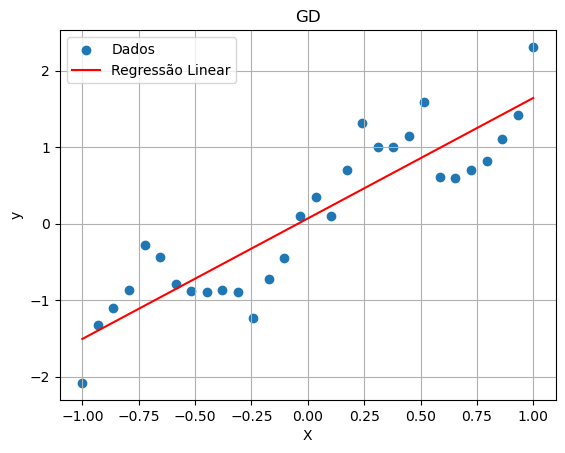

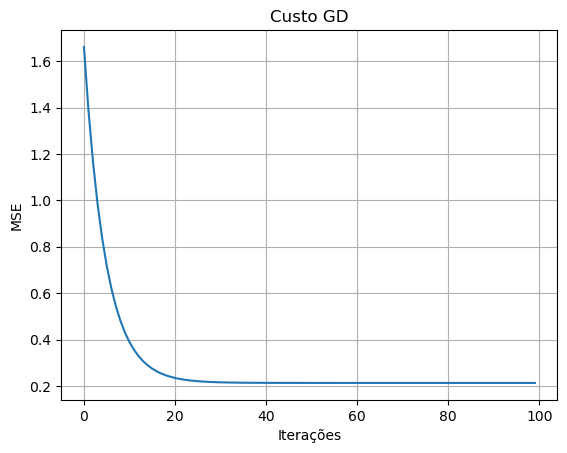

In [6]:
alpha = 1e-1
num_epochs = 100
np.random.seed(42)

w, losses, y_pred = gradient_descent(alpha, num_epochs, X, y)

print(f"MSE: {losses[-1]:.4f}")

plt.scatter(X, y, label="Dados")
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("GD")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(losses)
plt.title("Custo GD")
plt.xlabel("Iterações")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

c. Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem obtidos pelo algoritmo SGD (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

In [7]:
def stochastic_gradient_descent(alpha, num_epochs, X, y):
    N = X.shape[0]

    X_norm, _, _ = normalize(X)
    y_norm, y_mean, y_std = normalize(y)
    y_norm = y_norm.reshape(-1, 1)

    X_b = np.c_[np.ones((N, 1)), X_norm]
    w = np.random.randn(X_b.shape[1], 1)

    losses = []

    for epoch in range(num_epochs):
        indices = np.random.permutation(N)
        X_b_shuffled = X_b[indices]
        y_shuffled = y_norm[indices]

        for j in range(N):
            xj = X_b_shuffled[j:j+1]
            yj = y_shuffled[j:j+1]

            y_pred = xj @ w
            error = yj - y_pred

            w += alpha * error * xj.T

        y_pred_norm = X_b @ w
        y_pred = denormalize(y_pred_norm, y_mean, y_std)

        mse = np.mean((y - y_pred) ** 2)
        losses.append(mse)

        print(f"Época: {epoch}; MSE: {mse:.4f}")

    print("Pesos (w):\n", w)
    return w, losses, y_pred

Época: 0; MSE: 0.6992
Época: 1; MSE: 0.4823
Época: 2; MSE: 0.3590
Época: 3; MSE: 0.2922
Época: 4; MSE: 0.2564
Época: 5; MSE: 0.2373
Época: 6; MSE: 0.2268
Época: 7; MSE: 0.2201
Época: 8; MSE: 0.2173
Época: 9; MSE: 0.2154
Época: 10; MSE: 0.2146
Época: 11; MSE: 0.2142
Época: 12; MSE: 0.2139
Época: 13; MSE: 0.2137
Época: 14; MSE: 0.2136
Época: 15; MSE: 0.2136
Época: 16; MSE: 0.2135
Época: 17; MSE: 0.2134
Época: 18; MSE: 0.2134
Época: 19; MSE: 0.2134
Época: 20; MSE: 0.2134
Época: 21; MSE: 0.2134
Época: 22; MSE: 0.2134
Época: 23; MSE: 0.2134
Época: 24; MSE: 0.2134
Época: 25; MSE: 0.2134
Época: 26; MSE: 0.2134
Época: 27; MSE: 0.2134
Época: 28; MSE: 0.2134
Época: 29; MSE: 0.2134
Época: 30; MSE: 0.2134
Época: 31; MSE: 0.2134
Época: 32; MSE: 0.2134
Época: 33; MSE: 0.2134
Época: 34; MSE: 0.2134
Época: 35; MSE: 0.2134
Época: 36; MSE: 0.2135
Época: 37; MSE: 0.2135
Época: 38; MSE: 0.2134
Época: 39; MSE: 0.2134
Época: 40; MSE: 0.2134
Época: 41; MSE: 0.2134
Época: 42; MSE: 0.2134
Época: 43; MSE: 0.213

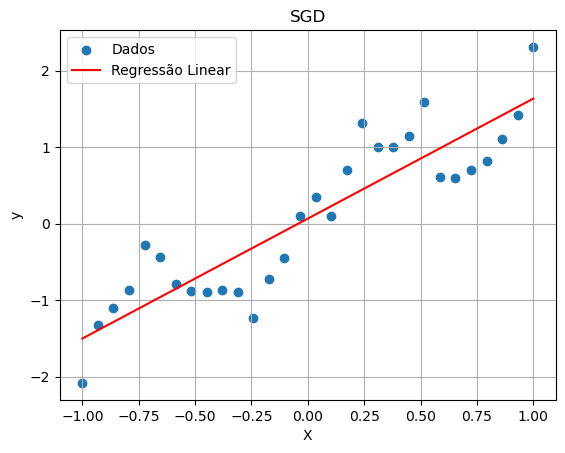

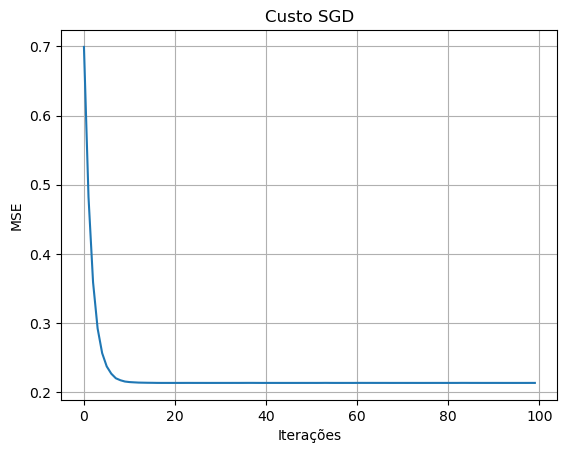

In [8]:
alpha = 1e-2
w, losses, y_pred = stochastic_gradient_descent(alpha, num_epochs, X, y)

print(f"MSE: {losses[-1]:.4f}")

plt.scatter(X, y, label="Dados")
plt.plot(X, y_pred, color='red', label="Regressão Linear")
plt.xlabel("X")
plt.ylabel("y")
plt.title("SGD")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(losses)
plt.title("Custo SGD")
plt.xlabel("Iterações")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

# Questão 2

Considere o conjunto de dados disponível em california.csv, organizado em 9 colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída. Os 8 atributos são usados na predição da mediana de preços de casas em distritos da Califórnia na década de 1990. Maiores detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset.

a. Aleatoriamente, divida o conjunto de dados em treino (80%) e teste (20%).

In [9]:
np.random.seed(42)

dataset = np.genfromtxt('./california.csv', delimiter=',')

X = dataset[:, :-1]
y = dataset[:, -1].reshape(-1, 1)

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])
train_idx = indices[:train_size]
test_idx = indices[train_size:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]


b. Treine 13 modelos de regressão polinomial, com ordens de 1 a 13. Você pode usar o algoritmo OLS.

In [10]:
def polynomial_features(X, degree):
    X_poly = [X ** d for d in range(1, degree + 1)]
    return np.concatenate(X_poly, axis=1)


In [11]:
for degree in range(1, 14):
    X_train_poly = polynomial_features(X_train, degree)
    X_test_poly = polynomial_features(X_test, degree)

    w_hat, _, _ = ols(X_train_poly, y_train)

    y_test_pred = np.c_[np.ones(X_test_poly.shape[0]), X_test_poly] @ w_hat

    test_mse = np.mean((y_test - y_test_pred) ** 2)

    loss_mse = []

    print(f"Grau:{degree}, MSE={test_mse:.4f}")
    loss_mse.append(test_mse)

Grau:1, MSE=0.4270
Grau:2, MSE=0.5266
Grau:3, MSE=0.4248
Grau:4, MSE=0.5609
Grau:5, MSE=0.8120
Grau:6, MSE=15.3664
Grau:7, MSE=5.1562
Grau:8, MSE=47.2538
Grau:9, MSE=31635.1997
Grau:10, MSE=126365.7600
Grau:11, MSE=778303.4501
Grau:12, MSE=609933760.5838
Grau:13, MSE=8433.3104


c. Reporte o RMSE (raiz quadrada do erro quadrático médio) no treinamento e no teste para cada modelo. Faça um gráfico para o treino e um gráfico para o teste.

In [12]:
def minmax_normalize(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    return (X - X_min) / (X_max - X_min), X_min, X_max

def minmax_denormalize(X_norm, X_min, X_max):
    return X_norm * (X_max - X_min) + X_min

def standard_normalize(y):
    mean = y.mean(axis=0)
    std = y.std(axis=0)
    return (y - mean) / std, mean, std

def standard_denormalize(y_norm, mean, std):
    return y_norm * std + mean

In [13]:
# normaliza a primeira vez
X_train_norm, X_min, X_max = minmax_normalize(X_train)
X_test_norm = (X_test - X_min) / (X_max - X_min)

y_train_norm, y_mean, y_std = standard_normalize(y_train)

In [14]:
train_rmse_list = []
test_rmse_list = []

for degree in range(1, 14):
    X_train_poly = polynomial_features(X_train_norm, degree)
    X_test_poly = polynomial_features(X_test_norm, degree)

    # normaliza após aplicar o polinômio
    X_train_poly_norm, X_poly_mean, X_poly_std = standard_normalize(X_train_poly)
    X_test_poly_norm = (X_test_poly - X_poly_mean) / X_poly_std

    w_hat, _, y_train_pred_norm = ols(X_train_poly_norm, y_train_norm)

    y_test_pred_norm = np.c_[np.ones(X_test_poly_norm.shape[0]), X_test_poly_norm] @ w_hat

    # desnormaliza saida antes de calcular a função de custo
    y_train_pred = standard_denormalize(y_train_pred_norm, y_mean, y_std)
    y_test_pred = standard_denormalize(y_test_pred_norm, y_mean, y_std)

    train_rmse = np.mean((y_train - y_train_pred) ** 2)
    test_rmse = np.mean((y_test - y_test_pred) ** 2)

    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

    print(f"Grau:{degree}, RMSE treino = {train_rmse:.4f}, RMSE teste = {test_rmse:.4f}")

Grau:1, RMSE treino = 0.4564, RMSE teste = 0.4270
Grau:2, RMSE treino = 0.4158, RMSE teste = 0.5266
Grau:3, RMSE treino = 0.3871, RMSE teste = 0.4248
Grau:4, RMSE treino = 0.3753, RMSE teste = 0.5519
Grau:5, RMSE treino = 0.3637, RMSE teste = 0.4631
Grau:6, RMSE treino = 0.3531, RMSE teste = 14.4046
Grau:7, RMSE treino = 0.3468, RMSE teste = 19.9583
Grau:8, RMSE treino = 0.3436, RMSE teste = 25.0548
Grau:9, RMSE treino = 0.3423, RMSE teste = 1307.4218
Grau:10, RMSE treino = 0.3343, RMSE teste = 2298.9761
Grau:11, RMSE treino = 0.8694, RMSE teste = 117514843.5952
Grau:12, RMSE treino = 0.3314, RMSE teste = 640989.9839
Grau:13, RMSE treino = 0.3241, RMSE teste = 15800021.5723


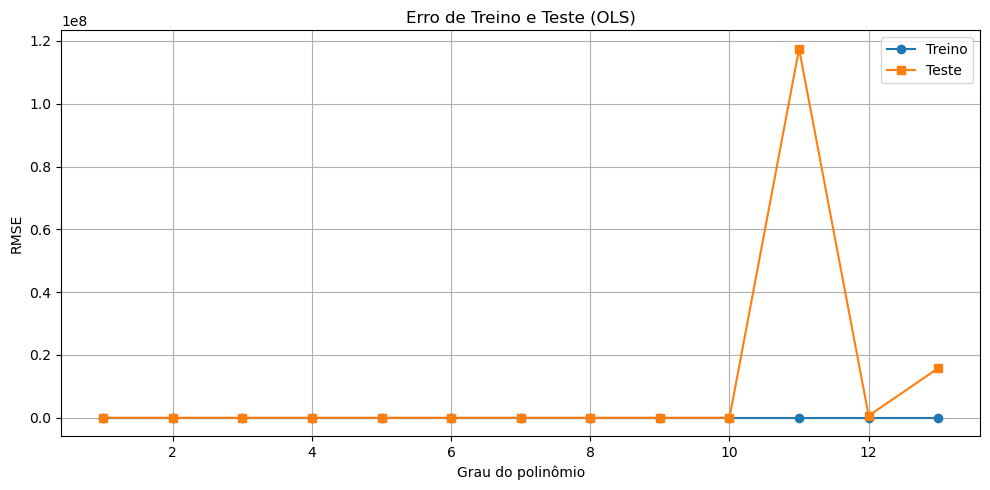

In [15]:
graus = np.arange(1, 14)

plt.figure(figsize=(10, 5))
plt.plot(graus, train_rmse_list, marker='o', label='Treino')
plt.plot(graus, test_rmse_list, marker='s', label='Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('Erro de Treino e Teste (OLS)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


d. Repita os 2 itens anteriores incluindo um termo de regularização L2 (por exemplo, com fator $\lambda$ = 0.01).

In [16]:
def ols_l2(X, y, lambd):
    N, _ = X.shape
    X = np.c_[np.ones(N), X]
    I = np.eye(X.shape[1])
    I[0, 0] = 0

    A = X.T @ X + lambd * I
    b = X.T @ y

    w_hat = np.linalg.solve(A, b)
    y_pred = X @ w_hat
    mse = (1/N) * np.sum((y - y_pred) ** 2)

    return w_hat, mse, y_pred


In [17]:
lambd = 0.01

train_rmse_l2 = []
test_rmse_l2 = []

for degree in range(1, 14):
    X_train_poly = polynomial_features(X_train_norm, degree)
    X_test_poly = polynomial_features(X_test_norm, degree)

    X_train_poly_norm, X_poly_mean, X_poly_std = standard_normalize(X_train_poly)
    X_test_poly_norm = (X_test_poly - X_poly_mean) / X_poly_std

    w_hat, _, y_train_pred_norm = ols_l2(X_train_poly_norm, y_train_norm, lambd)

    y_test_pred_norm = np.c_[np.ones(X_test_poly_norm.shape[0]), X_test_poly_norm] @ w_hat

    y_train_pred = standard_denormalize(y_train_pred_norm, y_mean, y_std)
    y_test_pred = standard_denormalize(y_test_pred_norm, y_mean, y_std)

    train_rmse = np.mean((y_train - y_train_pred) ** 2)
    test_rmse = np.mean((y_test - y_test_pred) ** 2)

    train_rmse_l2.append(train_rmse)
    test_rmse_l2.append(test_rmse)

    print(f"OLS com regularização [L2] Grau {degree}: RMSE treino = {train_rmse:.4f}, RMSE teste = {test_rmse:.4f}")


OLS com regularização [L2] Grau 1: RMSE treino = 0.4564, RMSE teste = 0.4270
OLS com regularização [L2] Grau 2: RMSE treino = 0.4158, RMSE teste = 0.5263
OLS com regularização [L2] Grau 3: RMSE treino = 0.3871, RMSE teste = 0.4251
OLS com regularização [L2] Grau 4: RMSE treino = 0.3761, RMSE teste = 0.4468
OLS com regularização [L2] Grau 5: RMSE treino = 0.3724, RMSE teste = 0.5566
OLS com regularização [L2] Grau 6: RMSE treino = 0.3683, RMSE teste = 0.7416
OLS com regularização [L2] Grau 7: RMSE treino = 0.3660, RMSE teste = 0.8864
OLS com regularização [L2] Grau 8: RMSE treino = 0.3645, RMSE teste = 0.8581
OLS com regularização [L2] Grau 9: RMSE treino = 0.3636, RMSE teste = 0.6814
OLS com regularização [L2] Grau 10: RMSE treino = 0.3630, RMSE teste = 0.4957
OLS com regularização [L2] Grau 11: RMSE treino = 0.3627, RMSE teste = 0.4146
OLS com regularização [L2] Grau 12: RMSE treino = 0.3624, RMSE teste = 0.4806
OLS com regularização [L2] Grau 13: RMSE treino = 0.3622, RMSE teste = 0.

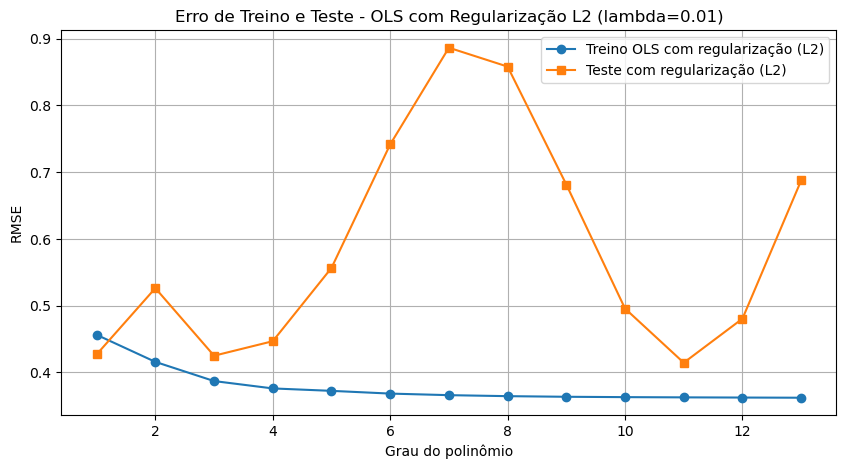

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(graus, train_rmse_l2, marker='o', label='Treino OLS com regularização (L2)')
plt.plot(graus, test_rmse_l2, marker='s', label='Teste com regularização (L2)')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('Erro de Treino e Teste - OLS com Regularização L2 (lambda=0.01)')
plt.legend()
plt.grid(True)
plt.show()
